In [1]:
#Adds higher directory to path, so we can access /ATS
import sys
sys.path.append("../")

from ATS.general import *
from ATS.QAQC import *

import pandas as pd

# Set the DataFram in pandas to show all columns and 1000 rows. Display plots inline
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)

# Load Data

<Item title:"SAC_CTS_CRLF_Terrestrial_Habitat_Monitoring" type:Feature Layer Collection owner:Anooshi>
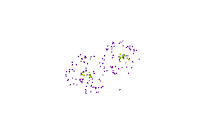

In [2]:
# Load data from arcGIS online
output = arcGIS_data_load('db5b18928c0e4a3a8c782d3c10ef4ca2')

MIG = output['data0']
feature_service = output['feature_service']

In [5]:
MIG.head()

,AbsenceofBarriers,Appropriatehabitat,BHR_Site,Comments,Date,GlobalID,Habitattype,OBJECTID,PointStatus,PresenceofRefugia,Presenceofpredators,Presenceofprey,SHAPE,Species_Sci,Surveyor1,Surveyor2
0,Yes,Yes,SAC,"Dispersal barriers absent, but grass is tall a...",2018-06-23 06:44:12,2d6e7806-d851-47a1-ae04-c502e29c939a,Oak Woodland,1,Completed,2,2,3,"{""x"": 6187038.211321965, ""y"": 2037806.18815597...",Ambystoma californiense,Joy Stewart,Marina Olson
1,Yes,Yes,SAC,Some burrows present in area; little evidence ...,2018-07-13 08:52:35,8f543832-f1d6-465b-a017-f7df33052748,Non-Native Grassland,2,Completed,4,5,5,"{""x"": 6187248.638066471, ""y"": 2036043.03256155...",Ambystoma californiense,Joy Stewart,None
2,Yes,Yes,SAC,Burrows and prey present. Ground squirrels pre...,2018-07-13 06:31:47,735d810e-1219-42eb-888a-2a817ff39daf,Wetland Tributary,3,Completed,4,5,4,"{""x"": 6186101.94055672, ""y"": 2034941.339554980...",Ambystoma californiense,Joy Stewart,None
3,Yes,Yes,SAC,Several burrows present. Lots of small grassho...,2018-06-23 07:43:52,a6fa4146-aaa1-4576-8072-d827bc6ff3a2,Non-Native Grassland,4,Completed,4,3,4,"{""x"": 6187024.01942122, ""y"": 2036928.662351980...",Ambystoma californiense,Joy Stewart,Marina Olson
4,Yes,Yes,SAC,"Few burrows present, no small mammals observed...",2018-06-23 07:17:21,bdbda693-5ee2-4b55-98bd-b9e5a4396d38,Non-Native Grassland,5,Completed,3,2,3,"{""x"": 6186995.677286297, ""y"": 2037425.71286706...",Ambystoma californiense,Joy Stewart,Marina Olson


In [6]:
#Rename and subset data
MIG.rename(columns={"Date": "Observation_Date"}, inplace=True)
sYear = input("Start Year? (YYYY)")
sub = year_subset(MIG, sYear)

Start Year? (YYYY)2018
Analysis for 2018-10-01 07:00 UTC to 2019-10-01 07:00 UTC
Entries in Subset: 80


# QAQC

In [7]:
MIG.columns

Index(['AbsenceofBarriers', 'Appropriatehabitat', 'BHR_Site', 'Comments',
       'Observation_Date', 'GlobalID', 'Habitattype', 'OBJECTID',
       'PointStatus', 'PresenceofRefugia', 'Presenceofpredators',
       'Presenceofprey', 'SHAPE', 'Species_Sci', 'Surveyor1', 'Surveyor2'],
      dtype='object')

In [8]:
# Search for whitespaces and extra spaces 
QAQC_whitespace(MIG, exclude_cols=['Comments'])

Name of Object ID Column:  ['OBJECTID']


Analysis for: Species_Sci
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Presenceofpredators
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Surveyor1
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Habitattype
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Surveyor2
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: AbsenceofBarriers
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: PointStatus
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Appropriatehabitat
No \xa0 char

In [9]:
#find blank entries - using sub here because there are a number of purposeful blank points
find_blank_entries(sub)

No blank AbsenceofBarriers
No blank Appropriatehabitat
No blank BHR_Site
No blank Comments
No blank Observation_Date
No blank GlobalID
No blank Habitattype
No blank OBJECTID
No blank PointStatus
No blank PresenceofRefugia
No blank Presenceofpredators
No blank Presenceofprey
No blank SHAPE
No blank Species_Sci
No blank Surveyor1
No blank Surveyor2


In [10]:
compare_years_catagorical(MIG, ['AbsenceofBarriers', 'Appropriatehabitat', 'BHR_Site',
       'Habitattype',  'PointStatus', 'PresenceofRefugia', 'Presenceofpredators', 'Presenceofprey',
       'Species_Sci', 'Surveyor1', 'Surveyor2'] ,'2017','2018')

In [13]:
field_order = [
    'BHR_Site',
    'Observation_Date',
    'Surveyor1', 
    'Surveyor2',
    'Species_Sci',
    'Habitattype', 
    'AbsenceofBarriers',
    'Presenceofpredators',
    'Presenceofprey',
    'PresenceofRefugia', 
    'Appropriatehabitat', 
    'PointStatus',
    'Comments',
    'OBJECTID',
    'GlobalID',
    'SHAPE',
    ]

In [14]:
export_data_deliverable(MIG, feature_service, field_order )

No Related Table Found
Exported to G:/Scripts_Toolboxes/Annual_Report/Outputs/SAC_Terrestrial_Habitat_Migration_Corridor_Monitoring_Data_20191205.xlsx
